In [215]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", 101)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [1]:
from pybaseball import playerid_lookup
playerid_lookup("goldschmidt","paul")

Gathering player lookup table. This may take a moment.


,name_last,name_first,key_mlbam,key_retro,key_bbref,key_fangraphs,mlb_played_first,mlb_played_last
0,goldschmidt,paul,502671,goldp001,goldspa01,9218,2011.0,2019.0


In [163]:
from pybaseball import statcast_batter
stats = statcast_batter('2019-03-01', '2019-09-13', 502671)

Gathering Player Data


In [182]:
stats.head()
mask = stats["home_team"] != "STL"
stats["opponent"] = np.where(mask, stats["home_team"], stats["away_team"])

In [183]:
homeruns = stats.query("events == 'home_run'")

In [184]:
# Fix colors
df_info = pd.read_json("/Users/tburch/Documents/gitDevelopment/baseball-studies/data/mlb_colors.json")
#df_info["original_colors"] = df_info.colors.map(lambda x: "#"+x[2:8])
df_info["color"]= df_info.colors.map(lambda x: "#"+str(list(x)[0]))
color_dict = df_info[["abb","color"]]
color_dict=color_dict.set_index("abb")
color_dict = color_dict.to_dict()["color"]
colors=list(homeruns['opponent'].value_counts().index.map(color_dict))

/Users/tburch/Documents/gitDevelopment/baseball-studies/venv_py3_baseball/lib/python3.7/site-packages/matplotlib/text.py:2178: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  warnings.warn("You have used the `textcoords` kwarg, but not "


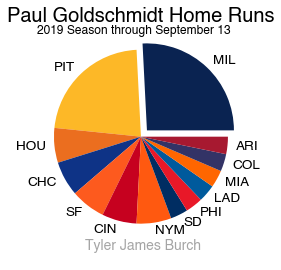

In [185]:
homeruns["opponent"].value_counts().plot.pie(figsize=(8,4), 
                     fontsize=13.5, 
                     colors=colors, 
                     shadow=False, 
                     explode=[0.1]+[0]*(len(tonight.index)-1))
plt.ylabel("")
plt.title("Paul Goldschmidt Home Runs", fontsize=20)
plt.figtext(.5,.86,'2019 Season through September 13', fontsize=12, ha='center')

plt.annotate(s="Tyler James Burch", xy=(.3,.075), xycoords='axes fraction',
            textcoords='figure fraction', color='grey',alpha=0.7, fontsize=14)
plt.savefig("../plots/goldschmidtHR.png")

In [205]:
nl_teams = ["MIL", "ARI","PIT","NYM","SF","PHI","CHC","COL","SD","LAD","MIA","CIN"]

In [223]:
pas = stats[~stats["events"].isna()] #.value_counts()
pa_per_ab = (pas["opponent"].value_counts() / homeruns["opponent"].value_counts()).dropna()
pa_per_ab = pa_per_ab[pa_per_ab.index.isin(nl_teams)]
pa_per_ab = pa_per_ab.sort_values()

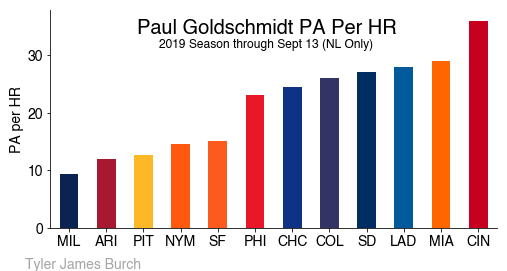

In [276]:
colors=list(pa_per_ab.index.map(color_dict))
pa_per_ab.plot(kind="bar", colors=colors, figsize=(8,4))

sns.despine()
plt.ylabel("PA per HR",fontsize=14)
plt.gca().tick_params(axis='both', labelsize=14)
plt.xticks(rotation=0)
plt.figtext(.5,.80,"Paul Goldschmidt PA Per HR", fontsize=20,ha="center")
plt.figtext(.5,.75,'2019 Season through Sept 13 (NL Only)', fontsize=12, ha='center')
plt.annotate(s="Tyler James Burch", xy=(.05,.01), xycoords='figure fraction',
            textcoords='figure fraction', color='grey',alpha=0.7, fontsize=14)

plt.savefig("../plots/goldschmidtHRrate.png")

In [253]:
pa_per_ab

MIL     9.250000
ARI    12.000000
PIT    12.571429
NYM    14.500000
SF     15.000000
PHI    23.000000
CHC    24.500000
COL    26.000000
SD     27.000000
LAD    28.000000
MIA    29.000000
CIN    36.000000
Name: opponent, dtype: float64

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,spin_dir,spin_rate_deprecated,break_angle_deprecated,break_length_deprecated,zone,des,game_type,stand,p_throws,home_team,away_team,type,hit_location,bb_type,balls,strikes,game_year,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,inning_topbot,hc_x,hc_y,tfs_deprecated,tfs_zulu_deprecated,fielder_2,umpire,sv_id,vx0,vy0,vz0,ax,ay,az,sz_top,sz_bot,hit_distance_sc,launch_speed,launch_angle,effective_speed,release_spin_rate,release_extension,game_pk,pitcher.1,fielder_2.1,fielder_3,fielder_4,fielder_5,fielder_6,fielder_7,fielder_8,fielder_9,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,pitch_number,pitch_name,home_score,away_score,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,opponent
0,SI,2019-09-13,92.7,-1.4612,6.0871,Paul Goldschmidt,502671,519076,home_run,hit_into_play_score,NaN,NaN,NaN,NaN,8.0,Paul Goldschmidt homers (31) on a fly ball to ...,R,R,R,STL,MIL,X,NaN,fly_ball,3,1,2019,-1.1232,0.6451,-0.0131,2.0042,NaN,451594.0,543939.0,1,6,Bot,98.05,22.21,NaN,NaN,518735.0,NaN,190914_023708,6.1963,-134.8364,-6.1136,-15.1163,27.2921,-23.1645,3.4500,1.6600,422.0,106.3,25.0,93.358,2411.0,6.546,566639,519076,518735.0,519346.0,605486.0,519058.0,606115.0,592325.0,663757.0,621438.0,53.9531,0.953,1.856,2.00,1.0,0.0,3.0,6.0,52,5,Sinker,7,0,7,0,0,7,7,0,Standard,Standard,MIL
5,FS,2019-09-13,81.1,-0.6821,6.1949,Paul Goldschmidt,502671,607188,strikeout,swinging_strike,NaN,NaN,NaN,NaN,14.0,Paul Goldschmidt strikes out swinging.,R,R,R,STL,MIL,S,2.0,NaN,1,2,2019,-0.4691,0.2834,0.2817,1.2281,NaN,NaN,543939.0,0,5,Bot,NaN,NaN,NaN,NaN,518735.0,NaN,190914_020525,3.0605,-118.1052,-5.1262,-4.9482,19.5915,-28.8254,3.4500,1.6600,NaN,NaN,NaN,81.767,1125.0,6.410,566639,607188,518735.0,519346.0,605486.0,519058.0,606115.0,663757.0,456715.0,592325.0,54.0898,NaN,NaN,0.00,1.0,0.0,0.0,NaN,40,4,Split Finger,4,0,4,0,0,4,4,0,Standard,Standard,MIL
9,SL,2019-09-13,86.3,-1.4174,6.0046,Paul Goldschmidt,502671,605288,home_run,hit_into_play_score,NaN,NaN,NaN,NaN,7.0,Paul Goldschmidt hits a grand slam (30) to lef...,R,R,R,STL,MIL,X,NaN,line_drive,2,2,2019,0.3575,0.2866,-0.3867,2.1724,425794.0,451594.0,543939.0,1,3,Bot,56.58,49.83,NaN,NaN,518735.0,NaN,190914_012319,1.7328,-125.8488,-3.6335,3.5799,20.0688,-28.6722,3.4500,1.6600,388.0,103.2,22.0,87.307,2240.0,6.336,566639,605288,518735.0,519346.0,605486.0,519058.0,606115.0,663757.0,456715.0,592325.0,54.1638,0.726,1.145,2.00,1.0,0.0,3.0,6.0,24,5,Slider,0,0,0,0,0,0,0,0,Standard,Standard,MIL
14,FT,2019-09-13,93.0,-0.9791,5.9794,Paul Goldschmidt,502671,605288,strikeout_double_play,called_strike,NaN,NaN,NaN,NaN,12.0,Paul Goldschmidt called out on strikes and Dex...,R,R,R,STL,MIL,S,2.0,NaN,3,2,2019,-1.0450,0.7668,0.8375,2.7263,NaN,NaN,451594.0,1,1,Bot,NaN,NaN,NaN,NaN,518735.0,NaN,190914_003852,7.0643,-135.4566,-4.4174,-14.5335,24.6226,-21.8063,3.4500,1.7580,NaN,NaN,NaN,94.672,1958.0,6.840,566639,605288,518735.0,519346.0,605486.0,519058.0,606115.0,663757.0,456715.0,592325.0,53.6591,NaN,NaN,0.00,1.0,0.0,0.0,NaN,8,7,2-Seam Fastball,0,0,0,0,0,0,0,0,Standard,Standard,MIL
21,SL,2019-09-12,85.9,-2.5645,5.8249,Paul Goldschmidt,502671,622075,double,hit_into_play_no_out,NaN,NaN,NaN,NaN,9.0,Paul Goldschmidt doubles (21) on a fly ball to...,R,R,R,COL,STL,X,9.0,fly_ball,0,1,2019,0.6048,-0.0937,0.3263,1.9032,NaN,NaN,NaN,2,8,Top,210.89,60.73,NaN,NaN,624513.0,NaN,190912_220329,5.6091,-125.0808,-2.9131,5.3201,22.1775,-32.8432,3.5100,1.7300,381.0,99.4,25.0,85.848,2512.0,5.949,565484,622075,624513.0,658069.0,641857.0,571448.0,641658.0,656541.0,602074.0,453568.0,54.5500,0.566,0.909,1.25,1.0,1.0,1.0,6.0,65,2,Slider,3,6,6,3,6,3,6,3,Standard,Standard,COL
23,FF,2019-09-11,98.8,-1.7689,5.9541,Paul Goldschmidt,502671,608032,strikeout,foul_tip,NaN,NaN,N